## Quadratic optimization

A nice, classical textbook:
* [B. Polyak, Introduction to optimization](https://www.researchgate.net/publication/342978480_Introduction_to_Optimization)

General unconditional single-objective optimization:

$$L(\mathbf w)\to\min_{\mathbf w\in \mathbb R^d}$$

A **fundamental example:** a quadratic loss function $L$,

$$L(\mathbf w)=\tfrac{1}{2}\mathbf w^T A\mathbf w-\mathbf w^T\mathbf b,$$

where $A$ is a $d\times d$ positive-definite matrix and $\mathbf b$ is a $d$-dimensional vector.

Relevant for smooth (linearizable) problems near a (local) solution.

**Typical applications: linear/nonlinear least-squares fitting.** Suppose we are given a data set $(\mathbf x_k, y_k=f(\mathbf x_k))_{n=1}^N$ representing some (true) dependence $y=f(\mathbf x)$ with $y\in\mathbb R$ and $\mathbf x\in \mathbb R^m$. We are fitting $f$ with some model (approximation)

$$y=\widehat f(\mathbf x, \mathbf w),\quad \mathbf x\in\mathbb R^m, \mathbf w\in\mathbb R^d,$$

where $\mathbf w$ are parameters ("weights") of the model.

For example:
1. a linear model $\widehat f(\mathbf x, \mathbf w)=\mathbf w^T\mathbf x+w_0$ (here $d=m$)
2. a linear model on nonlinear features of $\mathbf x$, i.e. $\widehat f(\mathbf x, \mathbf w)=\mathbf w^T\phi(\mathbf x)$ with some nonlinear $\phi:\mathbb R^m\to\mathbb R^d$
3. a fully nonlinear model $\widehat f$ such as a neural network

Loss function:

$$L(\mathbf w)=\frac{1}{2N}\sum_{n=1}^N (y_n-\widehat f(\mathbf x_n, \mathbf w))^2.$$

**Exercise:**
1. For which $\widehat f$ will this $L$ be exactly quadratic in $\mathbf w$?
2. Suppose that the model is linear, or is nonlinear (e.g., a neural network) but smooth and can be linearized w.r.t. $\mathbf w$ near the optimizer $\mathbf w_*$:
$$\widehat f(\mathbf x,\mathbf w)\approx \widehat f(\mathbf x,\mathbf w_*)+(\mathbf w-\mathbf w_*)^T\nabla_{\mathbf w}\widehat f(\mathbf x,\mathbf w_*)$$
Show that this makes the problem quadratic, and find $A$ and $\mathbf b$.

**Exercise (theoretical solution of quadratic problems).**
1. If matrix $A$ is invertible (strictly positive definite), then the problem has a unique minimizer $\mathbf w_*=A^{-1}\mathbf b$
2. What if $A$ is non-invertible?


**Example: polynomial interpolation.**

*Problem*: fit a function $f(x), x\in\mathbb R,$ using a degree-$(d-1)$ polynomial $p(x)=\sum_{k=0}^{d-1}w_kx^k$

*Training data*: a set of examples $(x_n, y_k=f(x_n))_{n=1}^N$ (in general, $N\ne d$)

We can consider this problem as a linear problem on features defined by the map
$$\phi(x)=(1,x,x^2,\ldots,x^{N-1})^T.$$

The *feature matrix*:
$$B=(\phi(x_n))_{n=1}^N,\quad B_{n,k}=(x_n)^k$$

The loss function:

$$L(\mathbf w)=\frac{1}{2N}\sum_{n=0}^{N-1}(y_n-\mathbf w^T\phi(x_n))^2,\quad \mathbf w=(w_0,\ldots,w_{d-1})^T$$


**Exercise.**
1. The matrix $A=\tfrac{1}{N}B^*B$, and $\mathbf b=\frac{1}{N}B^*\mathbf y,$ where $\mathbf y=(y_1,\ldots,y_N)^T$
2. Assuming $B^*B$ is nondegenerate, there is a unique minimizer $\mathbf w_*=(B^*B)^{-1}B^*\mathbf y$
3. $B^*B$ is nondegenerate if and only if the number of distinct points $t_n$ is not less than $d$

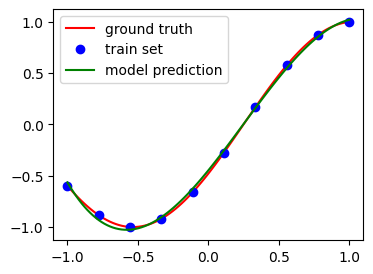

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d = 4
N = 10

def f(x): # ground truth
    return np.sin(2*x-0.5)

x_train = np.linspace(-1,1,N)
x_test = np.linspace(-1,1,100)
y_train = f(x_train)
y_test = f(x_test)

def B(x):
    '''get the feature matrix'''
    return np.array([x**k for k in range(d)]).T

def f_hat(x, w): # the model
    return B(x)@w

B_train = B(x_train)
# the optimum
w_opt = np.linalg.inv(B_train.T@B_train)@B_train.T@y_train
# respective predictions
y_pred = f_hat(x_test, w_opt)

plt.figure(figsize=(4,3))
plt.plot(x_test, y_test, '-r', label='ground truth')
plt.plot(x_train, y_train, 'ob', label='train set')
plt.plot(x_test, y_pred, '-g', label='model prediction')
plt.legend()
plt.show()

## Gradient descent
A general-purpose optimization method for (piecewise) differentiable loss functions:

$$\mathbf w_{t+1}=\mathbf w_t-\alpha_t \nabla_{\mathbf w}L(\mathbf w_t),$$
with a *learning rate* $\alpha_t>0.$

Useful even for quadratic problem if the dimension $d$ is large (e.g, modern neural networks may have $d\sim 10^6-10^{11}$ parameters).

**GD for quadratic problems:**
$$\mathbf w_{t+1}=\mathbf w_t-\alpha_t(A\mathbf w_t-\mathbf b)$$

Will the iterations converge to the true solution $\mathbf w_*$? Consider the dynamics in the eigenspace of $A$. Let $\mathbf v_k, \lambda_k$ be the $k$'th eigenvector and eigenvalue of $A$:

$$A\mathbf v_k=\lambda_k\mathbf v_k,$$

and let $c_{k,t}$ be the expansion coefficients of $\mathbf w_t$ over the orthonormal basis $\{\mathbf v_k\}$:
$$\mathbf w_t=\sum_{k=1}^d c_{k,t}\mathbf v_k.$$

Then all coefficients $c_{k,t}$ are evolved *independently* by GD:

$$c_{k,t+1}=c_{k,t}-\alpha_t(\lambda_kc_{k,t}-\widetilde b_{k}),$$

where $\mathbf b=\sum_k \widetilde b_k\mathbf v_k.$

In the basis $\{\mathbf v_k\}$, the solution $\mathbf w_*=A^{-1}\mathbf b$ is simply

$$\mathbf w_*=\sum_k c_{k,*}\mathbf v_k,\quad c_{k,*}=\lambda_k^{-1}\widetilde b_k.$$

Do we have convergence to the true solution,
$c_{k,t}\stackrel{t\to\infty}{\longrightarrow} c_{k,*}?$

Denote $\Delta \mathbf w_t=\mathbf w_t-\mathbf w_*$ and $\Delta c_{k,t}=c_{k,t}-c_{k,*},$ then

$$\Delta c_{k,t+1}=(1-\alpha_t\lambda_k)\Delta c_{k,t}.$$

Hence

$$\Delta c_{k,t+1}=\Big(\prod_{s=0}^{t}(1-\alpha_s\lambda_k)\Big)\Delta c_{k,0}.$$

Special case: constant (independent of $t$) learning rate

$$\alpha_t\equiv \alpha.$$

In this case

$$\Delta c_{k,t+1}=(1-\alpha\lambda_k)^{t+1}\Delta c_{k,0}.$$


**Theorem.** Assume that $A$ is nondegenerate and we use a constant learning rate $\alpha$. Then optimization converges if and only if $\alpha<\frac{2}{\lambda_{\max}}.$

Proof. Condition of convergence is $|1-\alpha\lambda_k| < 1$ for all $k$. This holds iff $\alpha<\frac{2}{\lambda_{\max}}.$ $\Box$

Consider the same example as before, but in pytorch:

In [ ]:
import torch # for automatic differentiation

d = 6
N = 10

def f_(x): # ground truth
    return torch.sin(2*x-0.5)

x_train_ = torch.linspace(-1,1,N)
x_test_ = torch.linspace(-1,1,100)
y_train_ = f_(x_train_)
y_test_ = f_(x_test_)

def B_(x):
    '''get the feature matrix'''
    B_ = torch.zeros((len(x),d))
    for k in range(d):
        B_[:,k] = x**k
    return B_

def f_hat_(x, w): # the model
    return B_(x)@w

def getLoss(w_, mode='train'):
    if mode == 'train':
        return 0.5*((y_train_-f_hat_(x_train_, w_))**2).mean()
    elif mode == 'test':
        return 0.5*((y_test_-f_hat_(x_test_, w_))**2).mean()

B_train_ = B_(x_train_)

#### Initial approximation:

Initial loss: tensor(0.2803)


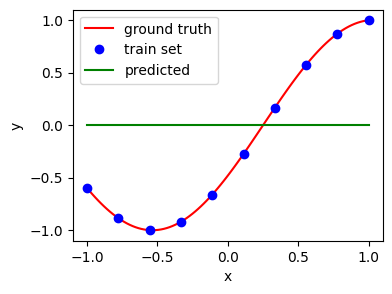

In [ ]:
# initial w
w_ = torch.zeros((d,))
# initial loss
loss = getLoss(w_)
print ('Initial loss:', loss)
# respective predictions
y_pred_ = f_hat_(x_test_, w_)

plt.figure(figsize=(4,3))
plt.plot(x_test_.numpy(), y_test_.numpy(), '-r', label='ground truth')
plt.plot(x_train_.numpy(), y_train_.numpy(), 'ob', label='train set')
plt.plot(x_test_.numpy(), y_pred_.numpy(), '-g', label='predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Spectral representation of the GD iteration:

Eigenvalues: tensor([8.2569e-04, 4.7062e-03, 5.1106e-02, 2.0386e-01, 8.2267e-01, 1.3148e+00])
Max learning rate (theoretical): 1.521144e+00


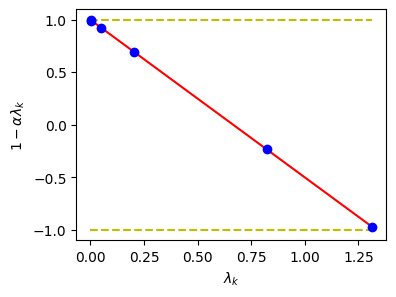

In [ ]:
A = B_train_.T@B_train_/N
eigs = torch.linalg.eigh(A).eigenvalues
print ('Eigenvalues:', eigs)
print ('Max learning rate (theoretical): %e' % float(2/eigs.max()))

alpha = 1.5
z = np.array([0, float(eigs.max())])
plt.figure(figsize=(4,3))
plt.plot(z, [1,1], '--y')
plt.plot(z, [-1,-1], '--y')
plt.plot(z, 1-alpha*z, '-r')
plt.plot(eigs.numpy(), 1-alpha*eigs.numpy(), 'ob')
plt.xlabel('$\lambda_k$')
plt.ylabel('$1-\\alpha\lambda_k$')
plt.show()

#### Loss trajectory during optimization:

Final train loss: 3.945366e-04
Final test loss: 4.233432e-04


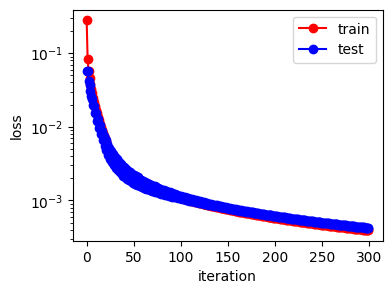

In [ ]:
w_.requires_grad=False
w_ *= 0
w_.requires_grad=True

lossesTrainL = []
lossesTestL = []

Niter = 300
for it in range(Niter):
    loss = getLoss(w_)
    lossesTrainL.append(float(loss))
    #print (float(loss))
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()
    lossesTestL.append(float(getLoss(w_, 'test')))


print ('Final train loss: %e' %lossesTrainL[-1])
print ('Final test loss: %e' %lossesTestL[-1])
plt.figure(figsize=(4,3))
plt.semilogy(lossesTrainL, '-or', label='train')
plt.semilogy(lossesTestL, '-ob', label='test')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

## Optimized constant learning rate
Suppose $\alpha$ is such that GD converges. How fast is the convergence $\mathbf w_t\stackrel{t\to\infty}{\longrightarrow}\mathbf w_*$ and $L(\mathbf w_t)\stackrel{t\to\infty}{\longrightarrow} L(\mathbf w_*)$?

Using $\Delta c_{k,t}=(1-\alpha\lambda_k)^t\Delta c_{k,0},$ we can bound

$$\begin{align}L(\mathbf w_t)-L(\mathbf w_*)={}&\tfrac{1}{2}\Delta\mathbf w_t^T A\Delta\mathbf w_t\\
={}&\frac{1}{2}\sum_{k}\lambda_k|\Delta c_{k,t}|^2\\
={}&\frac{1}{2}\sum_{k}\lambda_k|1-\alpha\lambda_k|^{2t}|\Delta c_{k,0}|^2\\
\le{}&\Big(\max_k|1-\alpha\lambda_k|\Big)^{2t}\Big(\frac{1}{2}\sum_{k}\lambda_k\Delta c_{k,0}|^2\Big)\\
={}&q^{2t}(L(\mathbf w_0)-L(\mathbf w_*)).
\end{align},$$
where

$$q=\max_k|1-\alpha\lambda_k|.$$

We are interested in

$$\alpha_{\mathrm{opt}}=\operatorname{argmin}_{\alpha}q.$$

This $\alpha_{\mathrm{opt}}$ can be found from the equation

$$1-\alpha_{\mathrm{opt}}\lambda_{\min}=-(1-\alpha_{\mathrm{opt}}\lambda_{\max}),$$

i.e.,

$$\alpha_{\mathrm{opt}}=\frac{2}{\lambda_{\min}+\lambda_{\max}}.$$

With this $\alpha,$ we have

$$q_{\text{opt}}=\max_k|1-\alpha_{\text{opt}}\lambda_k|=\frac{\lambda_{\max}-\lambda_{\min}}{\lambda_{\max}+\lambda_{\min}}=\frac{\frac{\lambda_{\max}}{\lambda_{\min}}-1}{\frac{\lambda_{\max}}{\lambda_{\min}}+1}=\frac{\kappa(A)-1}{\kappa(A)+1},$$

$$0 \le q_{\text{opt}} < 1.$$


**Conclusion:** Loss decreases exponentially fast, but convergence degrades for ill-conditioned problems.

### An interactive 2D illustration

$$L(\mathbf w)=\tfrac{1}{2}\big(\lambda_1(w_1-w_{1,*})^2+\lambda_2(w_2-w_{2,*})^2\big)$$

In [ ]:
from ipywidgets import interactive
from matplotlib import animation
from IPython.display import clear_output, display, HTML
%matplotlib inline

def opt2d(Niter=10, alpha=0.1, lam1=0.9, lam2=0.9, w1_opt=1, w2_opt=1):

    def getLoss1(w):
        return 0.5*(lam1*(w[0]-w1_opt)**2+lam2*(w[1]-w2_opt)**2)

    wHistory = np.empty((2,Niter+1))
    wHistory[:,0] = [0, 0]
    lossHistory = np.empty((Niter+1,))
    lossHistory[0] = getLoss1(wHistory[:,0])

    for it in range(Niter):
        wHistory[0,it+1] = wHistory[0,it]-alpha*lam1*(wHistory[0,it]-w1_opt)
        wHistory[1,it+1] = wHistory[1,it]-alpha*lam2*(wHistory[1,it]-w2_opt)
        lossHistory[it+1] = getLoss1(wHistory[:,it+1])

    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(121)

    # plot level sets
    initLoss = getLoss1([0,0])
    t = 2*np.pi*np.linspace(0,1,100)
    Nlevels = 7
    for k in range(Nlevels):
        r1 = (k+1)/Nlevels*np.sqrt(2*initLoss/lam1)
        r2 = (k+1)/Nlevels*np.sqrt(2*initLoss/lam2)
        plt.plot(r1*np.cos(t)+w1_opt, r2*np.sin(t)+w2_opt, '--k')


    plt.plot([w1_opt], [w2_opt], '*m')
    plt.plot([0], [0], 'sb')
    plt.plot(wHistory[0], wHistory[1], '-or')
    plt.axis('equal')
    ax1.set_xlim((-0.5, 2))
    ax1.set_ylim((-0.5, 2))
    plt.xlabel('w1')
    plt.ylabel('w2')

    ax1 = fig.add_subplot(122)
    plt.semilogy(lossHistory, '-o')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.tight_layout()

    plt.show()

In [ ]:
widget = interactive(opt2d, Niter=(5,30), alpha=(0.1, 3),
                lam1=(0.1, 2), lam2=(0.1, 2), w1_opt=(0.,2.), w2_opt=(0.,2.))
display(widget)

interactive(children=(IntSlider(value=10, description='Niter', max=30, min=5), FloatSlider(value=0.1, descript…

Back to polynomial fitting

Optimal learning rate: 1.520189e+00
Final train loss: 5.074048e-03
Final test loss: 4.190048e-03
(kappa(A)-1)/(kappa(A)+1): 0.9987448453903198


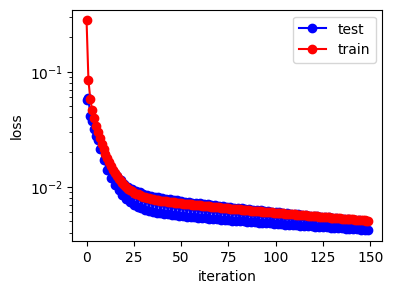

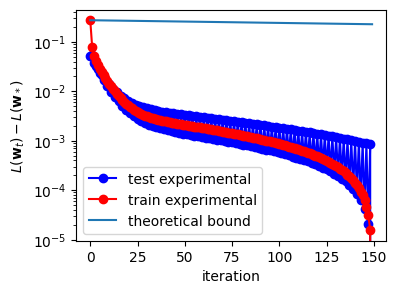

In [ ]:
w_.requires_grad=False
w_ *= 0
w_.requires_grad=True

alpha = float(2/(eigs.max()+eigs.min()))
print ('Optimal learning rate: %e' %alpha)

Niter = 150
lossesTrainL = np.empty(Niter)
lossesTestL = np.empty(Niter)

for it in range(Niter):
    loss = getLoss(w_)
    lossesTrainL[it] = float(loss)
    #print (float(loss))
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()
    lossesTestL[it] = float(getLoss(w_, 'test'))

print ('Final train loss: %e' %lossesTrainL[-1])
print ('Final test loss: %e' %lossesTestL[-1])

plt.figure(figsize=(4,3))
plt.semilogy(lossesTestL, '-ob', label='test')
plt.semilogy(lossesTrainL, '-or', label='train')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

plt.figure(figsize=(4,3))
plt.semilogy(lossesTestL-lossesTestL[-1], '-ob', label='test experimental')
plt.semilogy(lossesTrainL-lossesTrainL[-1], '-or', label='train experimental')

a = float((eigs.max()-eigs.min())/(eigs.max()+eigs.min()))
print ('(kappa(A)-1)/(kappa(A)+1):', a)
plt.semilogy((lossesTrainL[0]-lossesTrainL[-1])*a**np.arange(Niter), label='theoretical bound')

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$L(\mathbf{w}_t)-L(\mathbf{w}_*)$')
plt.show()

## Optimized schedule $\alpha_t$
It can be beneficial to use step-dependent learning rate $\alpha_t$ rather than constant one, $\alpha$. In this case

$$\Delta c_{k,t}=p_t(\lambda_k)\Delta c_{k,0},$$

where $$p_t(\lambda)=\prod_{s=0}^{t-1}(1-\alpha_s\lambda)$$

is a *residual polynomial* of degree $t$. ("Residual" means $p_t(0)=1$.) The $t$ roots of $p_t$ are $\alpha_s^{-1}, s=0,\ldots, t-1.$

We have

$$\begin{align}L(\mathbf w_t)-L(\mathbf w_*)
={}&\frac{1}{2}\sum_{k}\lambda_k|p_t(\lambda_k)|^{2}|\Delta c_{k,0}|^2\\
\le{}&\Big(\max_k|p_t(\lambda_k)|\Big)^{2}(L(\mathbf w_0)-L(\mathbf w_*)).
\end{align}$$

We can now arrange the learning rates $\alpha_s$ (or equivalently the roots $\alpha_s^{-1}$ of $p_t$) so as to minimize $\max_k|p_t(\lambda_k)|$. The residual polynomial $p_t$ minimizing the deviation

$$\max_{\lambda_{\min}\le \lambda\le \lambda_{\max}}|p_t(\lambda)|$$

is given explicitly in terms of *Chebyshev polynomials*.


**Chebyshev polynomials of 1st kind.**

https://en.wikipedia.org/wiki/Chebyshev_polynomials

$$T_t(x)=\begin{cases}\cos(t\arccos x),& |x|\le 1\\\tfrac{1}{2}\Big((x-\sqrt{x^2-1})^t+(x+\sqrt{x^2-1})^t\Big),& |x|\ge 1\end{cases}, \quad n=0,1,\ldots$$

We map the interval $[\lambda_\min,\lambda_\max]$ to $[-1,1]$ by the linear map $x(\lambda)=\tfrac{2\lambda-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min}$ and consider the residual polynomial

$$p_t(\lambda)=\frac{T_t(\tfrac{2\lambda-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min})}{T_t(\tfrac{-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min})}.$$

The roots $\alpha_s^{-1}$ of $p_t$ are

$$\alpha_s^{-1}=\frac{1}{2}\Big((\lambda_\max-\lambda_\min)\cos(\tfrac{\pi(s+1/2)}{t})+\lambda_\max+\lambda_\min\Big),\quad s=0,\ldots,t-1.$$


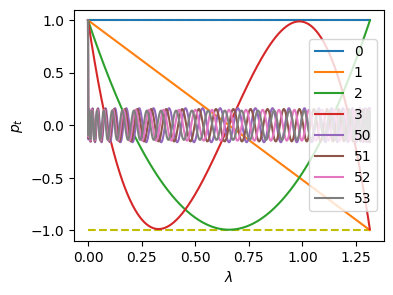

In [ ]:
from numpy.polynomial import Chebyshev
lmin, lmax = float(eigs.min()), float(eigs.max())
l = np.linspace(0,lmax,1000)

plt.figure(figsize=(4,3))
plt.plot(z, [1,1], '--y')
plt.plot(z, [-1,-1], '--y')

for t in list(range(4))+list(range(50, 54)):
    Tt = Chebyshev.basis(t)
    plt.plot(l, Tt((2*l-lmax-lmin)/(lmax-lmin))/Tt((-lmax-lmin)/(lmax-lmin)), label=t)

plt.legend(loc='right')
plt.xlabel('$\lambda$')
plt.ylabel('$p_t$')
plt.show()

How good is Chebyshev-based schedule?

$$\begin{align}\max_{\lambda_\min\le\lambda\le\lambda_\max}|p_t(\lambda)|={}&T_t^{-1}(\tfrac{-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min})\\
={}&2\Big|(x-\sqrt{x^2-1})^t+(x+\sqrt{x^2-1})^t\Big|^{-1}\bigg|_{x=\tfrac{-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min}}\\
={}&2|x-\sqrt{x^2-1}|^{-t}\Big|_{x=\tfrac{-\lambda_\max-\lambda_\min}{\lambda_\max-\lambda_\min}}(1+o(1))\\
\approx{}&2(1+\sqrt{2/\kappa(A)})^{-t}\\
\approx{}&2e^{-\sqrt{2/\kappa(A)}t},\quad \kappa(A)\gg 1.
\end{align}$$

In contrast, with constant $\alpha=\alpha_{\mathrm{opt}}$ we have

$$\begin{align}\max_{\lambda_\min\le\lambda\le\lambda_\max}|p_t(\lambda)|={}&\Big(\tfrac{\kappa(A)-1}{\kappa(A)+1}\Big)^t\\
\approx{}&e^{-2t/\kappa(A)},\quad \kappa(A)\gg 1.
\end{align}$$

However, Chebyshev learning rates $\alpha_s$ become very large when  $s$ is close to $t$, and optimization can become unstable.

Optimal learning rate: 1.520189e+00


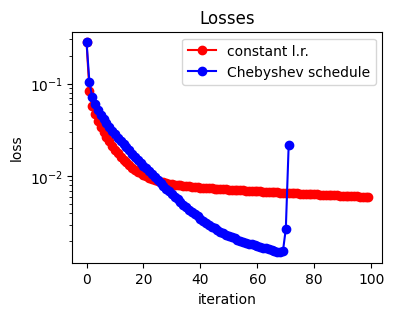

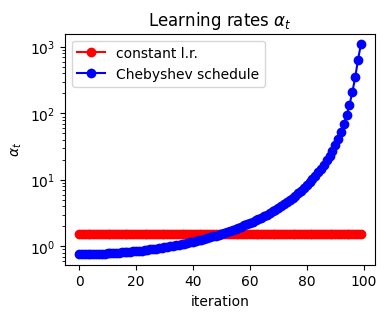

In [ ]:
w_.requires_grad=False
w_ = torch.zeros_like(w_)
w_.requires_grad=True

alpha = float(2/(eigs.max()+eigs.min()))
print ('Optimal learning rate: %e' %alpha)

Niter = 100

# constant learning rate
lossesTrainL = np.empty(Niter)

for it in range(Niter):
    loss = getLoss(w_)
    lossesTrainL[it] = float(loss)
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()

# Chebyshev schedule

w_.requires_grad=False
w_ = torch.zeros_like(w_)
w_.requires_grad=True

lossesTrainL_Cheb = np.empty(Niter)
alphaL = []

for it in range(Niter):
    alpha = 2/((lmax-lmin)*np.cos(np.pi*(it+0.5)/Niter)+lmax+lmin)
    alphaL.append(alpha)
    loss = getLoss(w_)
    lossesTrainL_Cheb[it] = float(loss)
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()

plt.figure(figsize=(4,3))
plt.semilogy(lossesTrainL, '-or', label='constant l.r.')
plt.semilogy(lossesTrainL_Cheb[:-28], '-ob', label='Chebyshev schedule')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Losses')

plt.figure(figsize=(4,3))
plt.semilogy(float(2/(eigs.max()+eigs.min()))*np.ones_like(lossesTrainL),
             '-or', label='constant l.r.')
plt.semilogy(alphaL, '-ob', label='Chebyshev schedule')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('$\\alpha_t$')
plt.title('Learning rates $\\alpha_t$')
plt.show()

## Preconditioning
Why is condition number $\kappa(A)$ large in our example?

Reason: strongly correlated features $x^k.$

**Exercise.** If some features in $\phi$ are repeated, then $A$ is degenerate; if features are strongly correlated, then $A$ has eigenvalues close to 0.

Condition number $\kappa(A)$ can sometimes be decreased by reducing correlation between features.

**Example.** Let us use Chebyshev polynomials $T_k$ as features, instead of monomials $x^k$. (Chebyshev polynomials are orthogonal w.r.t. a suitable measure on $[-1,1]$.)

In [ ]:
def get_B_(x, features='monomial'):
    '''get the feature matrix'''
    B_ = torch.zeros((len(x),d))
    for k in range(d):
        if features == 'monomial':
            B_[:,k] = x**k
        elif features == 'Cheb':
            B_[:,k] = Chebyshev.basis(k)(x)
    return B_

B_mon = get_B_(x_train_, features='monomial')
print ('Cond number for monomial features:', torch.linalg.cond(B_mon.T@B_mon))
B_Cheb = get_B_(x_train_, features='Cheb')
print ('Cond number for Chebyshev features:', torch.linalg.cond(B_Cheb.T@B_Cheb))

def f_hat_B(x, w, B_): # the model
    return B_@w

def getLoss_(w_, features='monomial'):
    if features == 'monomial':
        B_ = B_mon
    elif features == 'Cheb':
        B_ = B_Cheb
    return 0.5*((y_train_-f_hat_B(x_train_, w_, B_))**2).mean()

Cond number for monomial features: tensor(1592.3578)
Cond number for Chebyshev features: tensor(3.3532)


Learning rate for monomial features: 1.5201892852783203
Learning rate for Chebyshev features: 1.4201844930648804


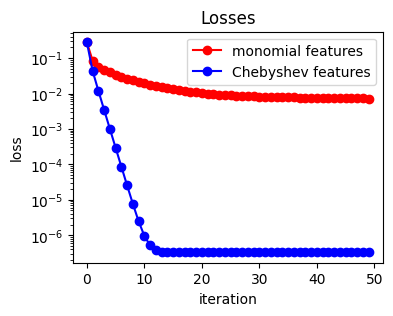

In [ ]:
Niter = 50

# standard features
A = B_mon.T@B_mon/N
eigs = torch.linalg.eigh(A).eigenvalues
alpha = float(2/(eigs.max()+eigs.min()))
print ('Learning rate for monomial features:', alpha)

lossesTrainL_mon = np.empty(Niter)

w_.requires_grad=False
w_ = torch.zeros_like(w_)
w_.requires_grad=True

for it in range(Niter):
    loss = getLoss_(w_, features='monomial')
    lossesTrainL_mon[it] = float(loss)
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()

# Chebyshev features
A1 = B_Cheb.T@B_Cheb/N
eigs1 = torch.linalg.eigh(A1).eigenvalues
alpha1 = float(2/(eigs1.max()+eigs1.min()))
print ('Learning rate for Chebyshev features:', alpha1)

lossesTrainL_Cheb = np.empty(Niter)

w_.requires_grad=False
w_ = torch.zeros_like(w_)
w_.requires_grad=True

for it in range(Niter):
    loss = getLoss_(w_, features='Cheb')
    lossesTrainL_Cheb[it] = float(loss)
    loss.backward()
    w_.data = w_.data-alpha1*w_.grad
    w_.grad.zero_()


plt.figure(figsize=(4,3))
plt.semilogy(lossesTrainL_mon, '-or', label='monomial features')
plt.semilogy(lossesTrainL_Cheb, '-ob', label='Chebyshev features')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Losses')

plt.show()

## GD with momentum (Heavy Ball)

GD with momentum:

$$\mathbf w_{t+1}=\mathbf w_t-\alpha_t\nabla L(\mathbf w_t)+\beta_t(\mathbf w_{t}-\mathbf w_{t-1})$$

Equivalently:
\begin{align}
\mathbf w_{t+1}={}&\mathbf w_t+\mathbf v_t\\
\mathbf v_t=&-\alpha_t\nabla L(\mathbf w_t)+\beta_t\mathbf v_{t-1}
\end{align}

Vanilla GD: special case $\beta=0.$

*Effective learning rate*: assuming $\alpha_t\equiv \alpha, \beta_t\equiv \beta,$

$$\alpha_{\mathrm{eff}}=\frac{\alpha}{1-\beta}=\alpha+\alpha\beta+\alpha\beta^2+\ldots$$


Interactive visualization: https://distill.pub/2017/momentum/

**Theorem.** Let $\alpha=\alpha_{\mathrm{opt}}$ and $\beta=\beta_{\mathrm{opt}},$ where

$$\alpha_{\mathrm{opt}}=\frac{4}{(\sqrt{\lambda_{\max}}+\sqrt{\lambda_{\min}})^2},\quad \beta_{\mathrm{opt}}=\frac{(\sqrt{\lambda_{\max}}-\sqrt{\lambda_{\min}})^2}{(\sqrt{\lambda_{\max}}+\sqrt{\lambda_{\min}})^2}.$$

Then

$$L(\mathbf w_t)-L(\mathbf w_{*})=O(q_{\text{HB}}^t), \quad q_{\text{HB}}=\frac{\sqrt{\lambda_{\max}}-\sqrt{\lambda_{\min}}}{\sqrt{\lambda_{\max}}+\sqrt{\lambda_{\min}}}=\frac{\sqrt{\kappa}-1}{\sqrt{\kappa}+1}.$$

**Comparison with vanilla GD at large $\kappa(A)$:**

\begin{align}q_{GD}={}&\frac{\kappa-1}{\kappa+1}\approx e^{-2/\kappa},\\
q_{HB}={}&\frac{\sqrt{\kappa}-1}{\sqrt{\kappa}+1}\approx e^{-2/\sqrt{\kappa}},\end{align}

so Heavy Ball should converge much faster than GD.

Moreover, HB is much more stable than GD with optimal variable learning rates.


Optimal alpha for vanilla GD: 1.520189e+00
Optimal alpha for Heavy Ball: 2.895355e+00
Optimal beta for Heavy Ball: 9.046019e-01


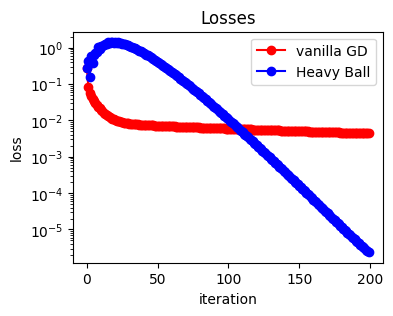

In [ ]:
w_.requires_grad=False
w_ = torch.zeros_like(w_)
w_.requires_grad=True

alpha = float(2/(eigs.max()+eigs.min()))
print ('Optimal alpha for vanilla GD: %e' %alpha)

Niter = 200

# Vanilla GD without momentum
lossesTrainL = np.empty(Niter)

for it in range(Niter):
    loss = getLoss(w_)
    lossesTrainL[it] = float(loss)
    loss.backward()
    w_.data = w_.data-alpha*w_.grad
    w_.grad.zero_()

# Heavy ball
w_.requires_grad=False
w_ = torch.zeros_like(w_)
v_ = torch.zeros_like(w_)
w_.requires_grad=True

alpha = float(4/(torch.sqrt(eigs.max())+torch.sqrt(eigs.min()))**2)
beta = float((torch.sqrt(eigs.max())-torch.sqrt(eigs.min()))**2/
             (torch.sqrt(eigs.max())+torch.sqrt(eigs.min()))**2)
print ('Optimal alpha for Heavy Ball: %e' %alpha)
print ('Optimal beta for Heavy Ball: %e' %beta)

lossesTrainL_HB = np.empty(Niter)

for it in range(Niter):
    loss = getLoss(w_)
    lossesTrainL_HB[it] = float(loss)
    loss.backward()
    v_.data = -alpha*w_.grad+beta*v_.data
    w_.data = w_.data+v_.data
    w_.grad.zero_()

plt.figure(figsize=(4,3))
plt.semilogy(lossesTrainL, '-or', label='vanilla GD')
plt.semilogy(lossesTrainL_HB, '-ob', label='Heavy Ball')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Losses')

plt.show()

**Exercise:** Find and plot several first residual polynomials corresponding to Heavy Ball. Try to explain why HB loss initially grows.

## Application to celestial choreography

(See Moore, C.: Braids in classical gravity. Phys. Rev. Lett. 70, 3675.)

We want to arrange positions and velocities of several 2D points so that they move periodically under Newton's gravity.

This can be done by minimizing the functional of mechanical action. Newton's dynamics of several particles under pairwise isotropic potential $V$ is:

$$\ddot{\mathbf{x}}_n=-\sum_{k:k\ne n} V'(|\mathbf x_n-\mathbf x_k|)\tfrac{\mathbf x_n-\mathbf x_k}{|\mathbf x_n-\mathbf x_k|}, \quad n=1,\ldots, N$$

(for Neuton's gravity, $V(r)=-\tfrac{1}{r}$).

These equations are equivalent to the Euler-Lagrange equations

$$\frac{d}{dt}\frac{\partial \mathcal L}{\partial\dot{\mathbf x}}=\frac{\partial \mathcal L}{\partial{\mathbf x}}$$

for the Lagrangian

$$\mathcal L=T_{\mathrm{total}}-V_{\mathrm{total}},$$

where $T_{\mathrm{total}}$ and $V_{\mathrm{total}}$ are the total kinetic and potential energy of the system:

$$\begin{align}
T_{\mathrm{total}} ={}& \frac{1}{2}\sum_{n=1}^N \dot{\mathbf x_n}^2,\\
V_{\mathrm{total}}={}&\sum_{1\le k <n\le N}V(|\mathbf x_n-\mathbf x_k|).
\end{align}$$

Euler-Lagrange equations are equivalent to vanishing variational derivative of the system's action:

$$\delta_{\mathbf x(t)}\mathcal S=0,$$

where

$$S=\int_{t_0}^{t_1} \mathcal L(\mathbf x, \dot{\mathbf x})dt.$$

**Exercise.** Check this ("*the principle of least (or stationary) action*").

Therefore, we can expect to obtain valid Newtonian trajectories by minimizing the action $S$ as a functional of $(\mathbf x_n(t))_{\substack{n=1,\ldots,N}\\ t\in[t_0,t_1]}$. We consider periodic and topologically nontrivial (braided) trajectories. In the case of Newton's gravity potential $-\tfrac{1}{r}$, loss $S$ grows to $+\infty$ when particles become close to each other, so the topological order should be preserved in the course of gradient-based optimization.


Initial loss: 237.92959594726562
Final loss: 30.553213119506836


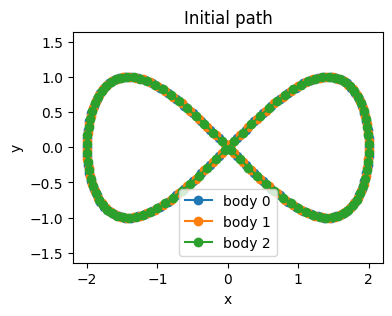

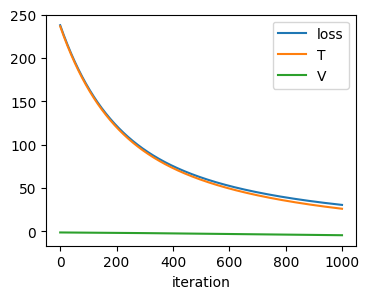

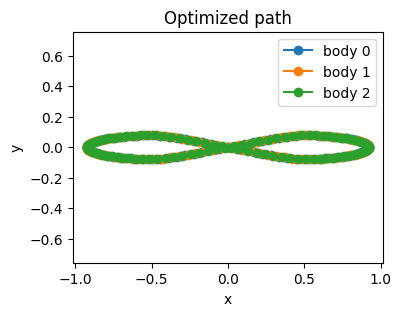

In [ ]:
Nbody = 3
Ntime = 100
r = torch.empty((Nbody, 2, Ntime))
t = torch.arange(Ntime)/Ntime
for b in range(Nbody):
    r[b,0] = 2*torch.cos(2*np.pi*(t-float(b)/Nbody))
    r[b,1] = torch.sin(4*np.pi*(t-float(b)/Nbody))

plt.figure(figsize=(4,3))
for b in range(Nbody):
    plt.plot(r[b,0], r[b,1], '-o', label='body '+str(b))
plt.axis('equal')
plt.title('Initial path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

def getLoss3(r):
    T = 0.5*((r-torch.roll(r, 1, 2))**2).mean(dim=2).sum()*Ntime**2
    V = 0
    for b0 in range(Nbody):
        for b1 in range(b0):
             V = V-(((r[b0,0]-r[b1,0])**2+(r[b0,1]-r[b1,1])**2)**(-0.5)).mean()
    return T-V, T, V

r.requires_grad = True

lossL = []
TL = []
VL = []

lr = 2e-3
for it in range(1000):
    loss, T, V = getLoss3(r)
    #print (loss, T, V)
    lossL.append(float(loss))
    TL.append(float(T))
    VL.append(float(V))
    loss.backward()
    r.data = r.data-lr*r.grad
    r.grad.zero_()

print ('Initial loss:', lossL[0])
print ('Final loss:', lossL[-1])

plt.figure(figsize=(4,3))
plt.plot(lossL, label='loss')
plt.plot(TL, label='T')
plt.plot(VL, label='V')
plt.legend()
plt.xlabel('iteration')

r1 = r.detach().numpy()

plt.figure(figsize=(4,3))
for b in range(Nbody):
    plt.plot(r1[b,0], r1[b,1], '-o', label='body '+str(b))
plt.axis('equal')
plt.title('Optimized path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Exercise:** Explain theoretically the loss curve as a function of iteration by approximating the loss functional $L$ by a quadratic form on the space of paths and analyzing its spectral properties.

### Preconditioning
Convergence is slow because the problem is ill-conditioned. Though the problem is not exactly quadratic, we can roughly estimate conditioning of the kinetic and potential terms in $S$. The potential term is reasonably well-conditioned (**exercise:** perform a careful perturbative analysis by considering small deviations from the optimal trajectory), but the kinetic term is ill-conditioned due to high-frequency oscillations. If $\mathbf x(t)$ is Fourier-expanded over harmonics $e^{2\pi ikt}$ with different frequencies $k$:

$$\mathbf x(t)=\sum_{k}\mathbf{c}_k e^{2\pi ikt},$$

then the kinetic part of the action for each particle becomes

$$\frac{1}{2}\int_{0}^1\dot{\mathbf x}^2dt\propto \sum_k |k|^2 \mathbf c_k^2.$$

This suggests that we can improve convergence by a two-step coordinate transformation:
1. Replace $\mathbf x(t)$ by Fourier features $\mathbf c_k$
2. Rescale $\mathbf c_k\mapsto |k|\mathbf c_k$ to get an (approximately) scalar kinetic quadratic form.



In [ ]:
def ff(x): # direct feature transform
    y = torch.empty_like(x)
    assert x.ndim == 3 and x.shape[-1]%2 == 0
    y_ = torch.fft.rfftn(x, dim=(2,))
    y_ = y_*(1+torch.arange(y_.shape[-1])) # rescale Fourier components
    y[:,:,:x.shape[-1]//2+1] = y_.real
    y[:,:,x.shape[-1]//2+1:] = y_[:,:,1:-1].imag
    return y

def iff(y): # inverse transform
    assert y.ndim == 3 and y.shape[-1]%2 == 0
    scalingA = 1+torch.arange(y.shape[-1])
    y_ = y[:,:,:y.shape[-1]//2+1]+0j
    y_[:,:,1:-1] = (y_[:,:,1:-1]+1j*y[:,:,y.shape[-1]//2+1:])
    y_ = y_/(1+torch.arange(y_.shape[-1])) # rescale Fourier components
    x = torch.fft.irfftn(y_, dim=(2,))
    return x

assert torch.linalg.norm(r-iff(ff(r))) < 1e-5

This ransformation indeed substantially accelerates convergence.

Initial loss: 238.12435913085938
Final loss: 13.207781791687012


<Figure size 400x300 with 0 Axes>

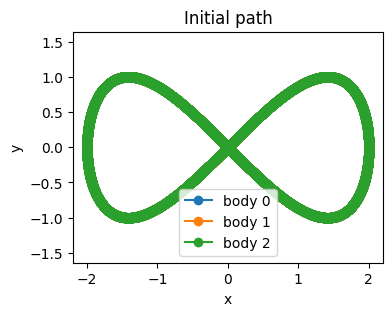

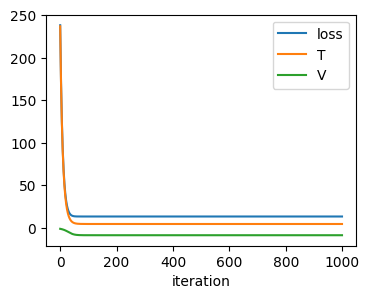

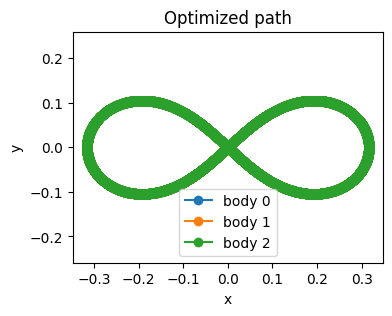

In [ ]:
Nbody = 3
Ntime = 10000
r = torch.empty((Nbody, 2, Ntime))
t = torch.arange(Ntime)/Ntime
for b in range(Nbody):
    r[b,0] = 2*torch.cos(2*np.pi*(t-float(b)/Nbody))
    r[b,1] = torch.sin(4*np.pi*(t-float(b)/Nbody))

w = ff(r)

#%matplotlib auto
%matplotlib inline
plt.figure(figsize=(4,3))
r = iff(w)
r1 = r.detach().numpy()
for b in range(Nbody):
    plt.plot(r1[b,0], r1[b,1], '-o', label='body '+str(b))
plt.axis('equal')
plt.title('Initial path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

def getLoss4(w):
    r = iff(w)
    T = 0.5*((r-torch.roll(r, 1, 2))**2).mean(dim=2).sum()*Ntime**2
    V = 0
    for b0 in range(Nbody):
        for b1 in range(b0):
             V = V-(((r[b0,0]-r[b1,0])**2+(r[b0,1]-r[b1,1])**2)**(-0.5)).mean()
    return T-V, T, V

w.requires_grad = True

lossL = []
TL = []
VL = []

lr = 2e5
for it in range(1000):
    loss, T, V = getLoss4(w)
    #print (loss, T, V)
    lossL.append(float(loss))
    TL.append(float(T))
    VL.append(float(V))
    loss.backward()
    w.data = w.data-lr*w.grad
    w.grad.zero_()

print ('Initial loss:', lossL[0])
print ('Final loss:', lossL[-1])

plt.figure(figsize=(4,3))
plt.plot(lossL, label='loss')
plt.plot(TL, label='T')
plt.plot(VL, label='V')
plt.xlabel('iteration')
plt.legend()

plt.figure(figsize=(4,3))
r = iff(w)
r1 = r.detach().numpy()
for b in range(Nbody):
    plt.plot(r1[b,0], r1[b,1], '-o', label='body '+str(b))
plt.axis('equal')
plt.title('Optimized path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Check by direct Newtonian ODE simulation that we obtain a valid periodic trajectory.

In [ ]:
import matplotlib.animation as animation
from matplotlib import animation, rc
rc('animation', html='jshtml')

# only use optimization result to get initial positions and velocities
x = r1[:,0,0]+1j*r1[:,1,0]
v = ((r1[:,0,1]+1j*r1[:,1,1])-(r1[:,0,0]+1j*r1[:,1,0]))*Ntime
print (x)
print (v)

def F(a, b):   # Newton's gravity
    return (b-a)/np.abs(b-a)**3

def integrate(F, x, v, dt, N):
    def F_all(x):
        allF = np.zeros_like(x)
        for n in range(len(x)):
            for m in range(len(x)):
                if m != n:
                    allF[n] += F(x[n], x[m])
        return allF

    xHistory = [np.array(x)] # at integer times
    vHistory_ = [np.array(v)+dt/2.*F_all(x)] # at half-integer times
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*F_all(xHistory[-1]))
    vHistory = [v]+[(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)
    return xHistory, vHistory

m = 2
dt = 10**(-2)
xHistory, vHistory = integrate(F, x, v, dt=dt, N=int(1./dt))
tHistory = dt*np.arange(len(xHistory))

%matplotlib auto
#%matplotlib inline

plt.figure(figsize=(4,3))
fig, ax = plt.subplots()

# trajectories
for n in range(len(x)):
    plt.plot([x.real[n] for x in xHistory], [x.imag[n] for x in xHistory], ':')

# animated dots
dots, = plt.plot(xHistory[0].real, xHistory[0].imag, 'ob')

title = plt.title('')

def animate(i): # update the data
    dots.set_xdata([xHistory[i].real])
    dots.set_ydata([xHistory[i].imag])
    title.set_text("t = %2.3f" %(tHistory[i]))

ani = animation.FuncAnimation(fig, animate, len(tHistory),
    interval=25)

plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.close()

ani

[ 0.31604615+6.97489725e-07j -0.15802272+1.00941956e-01j
 -0.15802264-1.00940272e-01j]
[ 0.       +0.86418885j  2.0292401-0.43332577j -2.028644 -0.43071806j]
Using matplotlib backend: agg


**Exercise:** Accelerate optimization by using Heavy Ball instead of preconditioning.